# Cleaning dataset to achieve a  dataset for location Duisburg-Walsum. 

In [21]:
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 10,10

In [22]:
meteo = pd.read_csv('../Data/cleanned/meteo.csv')
aq = pd.read_csv('../Data/cleanned/AQ.csv')

In [23]:
# Split the date column into two columns named date and time
meteo[['date', 'time']] = meteo['time'].str.split(' ', 1, expand=True)
aq.drop(['dtbeg', 'tmbeg', 'chemName', 'locationName'], axis=1, inplace=True)
aq.rename(columns={'dtend': 'date', 'tmend': 'time'}, inplace=True)
allDf = aq.merge(meteo, on=['date', 'time'], how='inner')
allDf['date'] = allDf['date'] + ' ' + allDf['time']
allDf = allDf.drop(['time'], axis=1)
allDf['date'] = pd.to_datetime(allDf['date'])


In [24]:
fig1 = ex.line(
    allDf,
    x='date',
    y=['wert', 'temp', 'dwpt', 'rhum', 'prcp'],
    title='Duisburg-Walsum',
)
fig1.show()

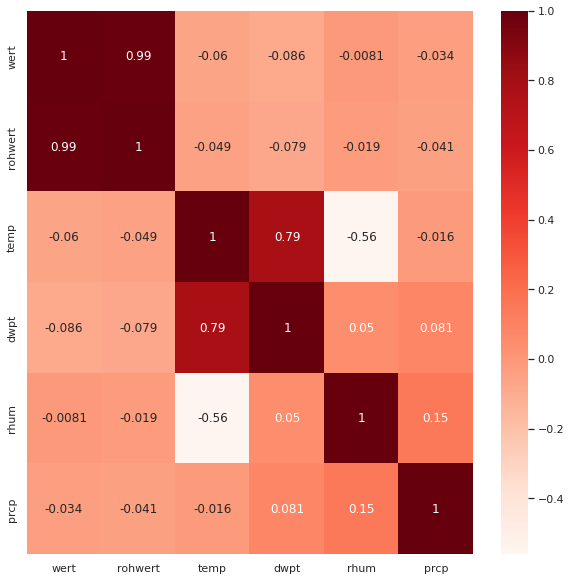

In [25]:
cor = allDf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
allDf.to_csv('../Data/cleanned/allDf.csv', index=False)